# Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Understanding Data

In [3]:
df = pd.read_csv('UEFA Leagues Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   League            108 non-null    object 
 1   Pot               108 non-null    object 
 2   Team              108 non-null    object 
 3   Country           108 non-null    object 
 4   Market Value (€)  108 non-null    object 
 5   Average Age       108 non-null    float64
dtypes: float64(1), object(5)
memory usage: 5.2+ KB


In [5]:
df.describe()

,Average Age
count,108.000000
mean,25.355556
std,1.280357
min,21.700000
25%,24.500000
50%,25.300000
75%,26.200000
max,28.200000


In [6]:
df.isnull().sum()

,0
League,0
Pot,0
Team,0
Country,0
Market Value (€),0
Average Age,0


Normally, market value must be numerical value. However, because of the string part it seems a categorical data. We must edit this.

In [7]:
df.head(3)

,League,Pot,Team,Country,Market Value (€),Average Age
0,Champions League,Pot 1,Real Madrid,Spain,1.34 Billion,26.6
1,Champions League,Pot 1,Manchester City,England,1.27 Billion,27.0
2,Champions League,Pot 1,Bayern München,Germany,943.65 Million,25.6


In [8]:
df['Market Value (€)'] = df['Market Value (€)'].str.replace('Billion', "")
df['Market Value (€)'] = df['Market Value (€)'].str.replace('Million', "")
df['Market Value (€)'] = df['Market Value (€)'].str.replace('million', "")

The strings were removed on the numerical value. Then that data type is converted to numeric.

In [10]:
df['Market Value (€)'] = df['Market Value (€)'].astype('float32')

In [11]:
for index, value in enumerate(df['Market Value (€)']):
    if value < 2.0:
        df.at[index, 'Market Value (€)'] = value * 1000

There were phares with billion in market value column. After data cleaning, these billion numbers converted to million type

In [12]:
df['Market Value (€)']

,Market Value (€)
0,1340.000033
1,1269.999981
2,943.650024
3,882.700012
4,923.000000
...,...
103,3.750000
104,7.230000
105,22.230000
106,7.710000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   League            108 non-null    object 
 1   Pot               108 non-null    object 
 2   Team              108 non-null    object 
 3   Country           108 non-null    object 
 4   Market Value (€)  108 non-null    float64
 5   Average Age       108 non-null    float64
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


Now we convert market value column to numerical data.

# Data Visulation

- League

([<matplotlib.patches.Wedge at 0x7cfff2963d30>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Champions League'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Europe League'),
  Text(0.5500001486524352, -0.9526278583383436, 'Conference League')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

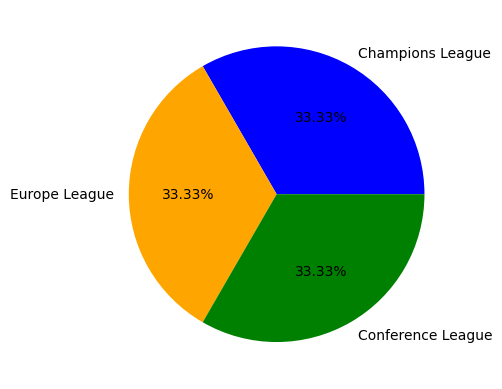

In [14]:
champ = df['League'].value_counts()['Champions League']
europe = df['League'].value_counts()['Europe League']
conference = df['League'].value_counts()['Conference League']

labels = ['Champions League', 'Europe League', 'Conference League']
values = [champ, europe, conference]
colors = ['blue', 'orange', 'green']

plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

Both of 3 leagues have same number of teams

- Country

<Axes: title={'center': 'Frequency of countries'}, xlabel='Country'>

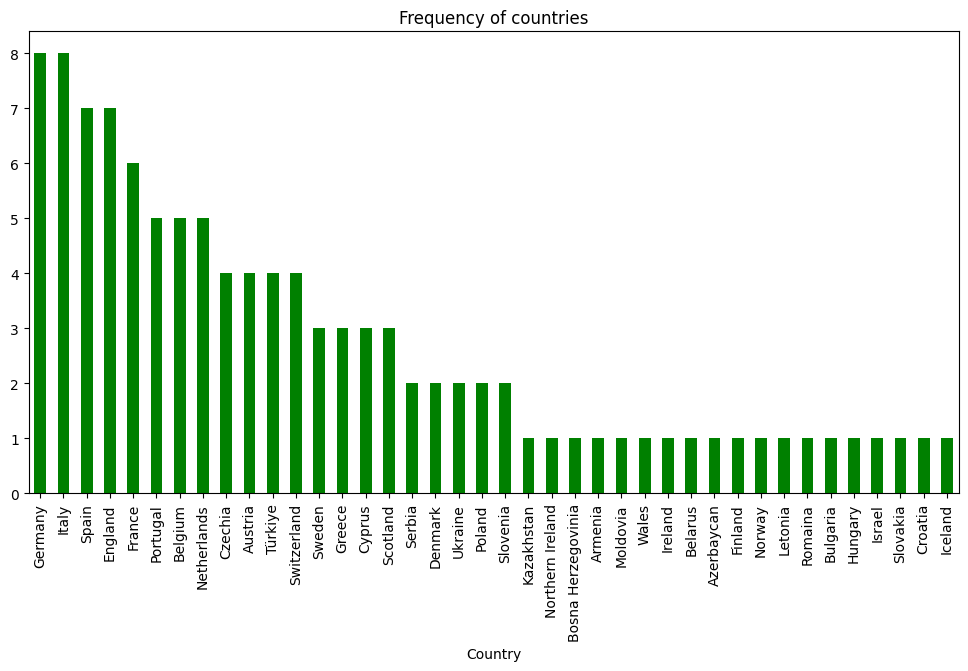

In [15]:
country_counts = df['Country'].value_counts()
plt.figure(figsize = (12, 6))
plt.title('Frequency of countries')
country_counts.plot(kind='bar', color='green')

- Market Value (€)

In [16]:
market_value_of_total_countries = df.groupby('Country')['Market Value (€)'].sum().reset_index()

In [17]:
print(market_value_of_total_countries)

               Country  Market Value (€)
0              Armenia          7.710000
1              Austria        319.750002
2           Azerbaycan         18.980000
3              Belarus          7.230000
4              Belgium        516.350014
5   Bosna Herzegovinia          7.410000
6             Bulgaria         49.650002
7              Croatia         71.599998
8               Cyprus         57.490000
9              Czechia        203.800000
10             Denmark        133.200005
11             England       6571.499938
12             Finland          7.550000
13              France       2084.000015
14             Germany       3330.110008
15              Greece        277.650002
16             Hungary         55.230000
17             Iceland          3.490000
18             Ireland          4.280000
19              Israel         22.000000
20               Italy       3392.309998
21          Kazakhstan          9.550000
22             Letonia          9.430000
23            Mo

<BarContainer object of 40 artists>

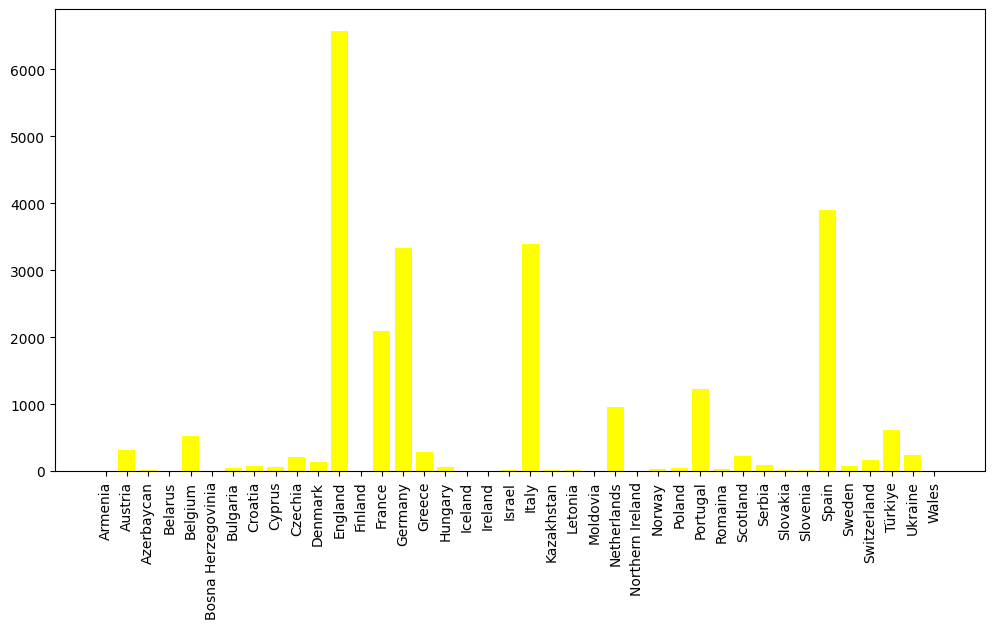

In [18]:
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 90)
plt.bar(market_value_of_total_countries['Country'], market_value_of_total_countries['Market Value (€)'], color = 'yellow')

- Average Age

In [19]:
ages_of_countries = df.groupby('Country')['Average Age'].mean().reset_index()

In [20]:
print(ages_of_countries)

               Country  Average Age
0              Armenia    27.000000
1              Austria    23.600000
2           Azerbaycan    26.900000
3              Belarus    25.000000
4              Belgium    24.780000
5   Bosna Herzegovinia    25.000000
6             Bulgaria    27.300000
7              Croatia    25.000000
8               Cyprus    25.566667
9              Czechia    25.100000
10             Denmark    24.450000
11             England    25.628571
12             Finland    25.600000
13              France    24.850000
14             Germany    24.925000
15              Greece    26.666667
16             Hungary    26.900000
17             Iceland    26.800000
18             Ireland    25.700000
19              Israel    25.300000
20               Italy    26.012500
21          Kazakhstan    27.700000
22             Letonia    26.100000
23            Moldovia    25.200000
24         Netherlands    23.900000
25    Northern Ireland    25.400000
26              Norway    25

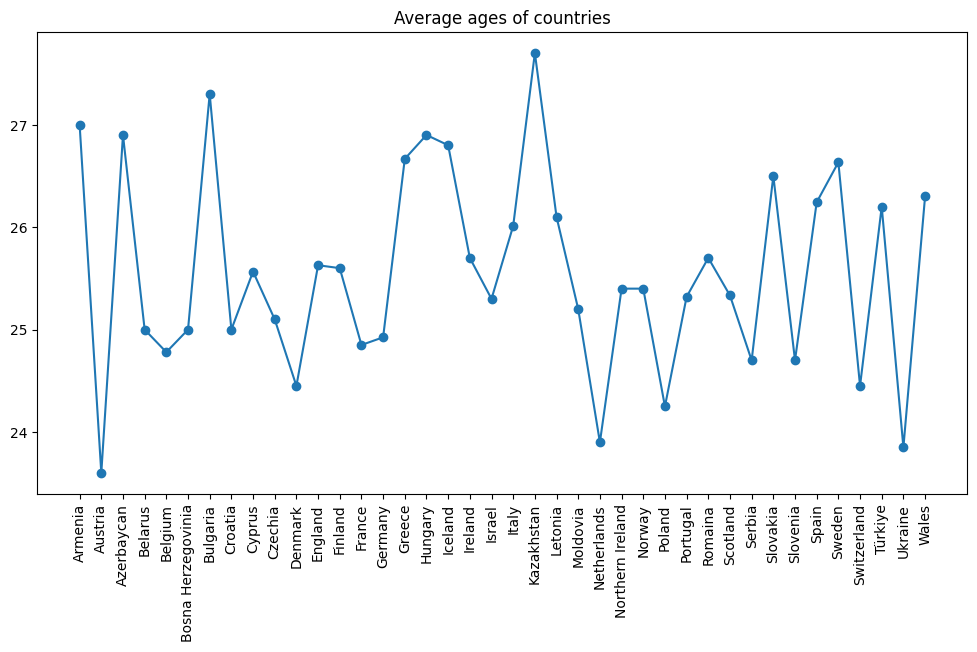

In [30]:
plt.figure(figsize = (12, 6))
plt.title('Average ages of countries')
plt.xticks(rotation = 90)
plt.plot(ages_of_countries['Country'], ages_of_countries['Average Age'], marker = 'o')